In [54]:
from torch.utils.data import DataLoader , TensorDataset
import numpy as np
import pandas as pd
import sklearn as sk
import torch.nn.functional as F
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from torch.nn

In [55]:
data =  np.random.randint(-10,11,size = (100,2))
labels = np.zeros((100,1))

for i,k in enumerate(data):
  labels[i] = sum(k)


In [56]:
max(labels)

array([19.])

In [57]:
dataT = torch.Tensor(data).float()
labelsT = torch.Tensor(labels).float()

train_X ,test_X , train_y,test_y = train_test_split(dataT,labelsT)

test_data =  TensorDataset(train_X ,train_y)
train_data = TensorDataset(train_X,train_y)

train_lod = DataLoader(train_data,batch_size = 12 , drop_last=True)
test_lod = DataLoader(test_data,batch_size = 12 , drop_last=True)

In [58]:
def summator(optim,lrk):
  class sumnet(nn.Module):
    def __init__(self):
      super().__init__()
      # self.input = nn.Linear(2,4)
      # self.input = nn.Linear(2,4)

      # self.hd1 = nn.Linear(4,1)


      self.output = nn.Linear(2,1)

    def forward(self, x):
      # x = self.input(x)# Relu на самом деле не имеет смысла делать как и хайден лейры потомучто я просто суммирую это ленейная функция

      # x = F.relu(self.hd1(x))

      x = self.output(x)
      return x


  net =  sumnet()

  optifan = getattr(torch.optim, optim)

  optimazer = optifan(net.parameters() , lr = lrk)

  lossfan =    nn.MSELoss() # getattr(nn,optim)

  return lossfan,optimazer,net

In [59]:
X,y = next(iter(train_lod))

lossfan,optimazer,net = summator('SGD',1)
yhst = net(X)
print(yhst,'\n',y)
loss = lossfan(yhst,y)
optimazer.zero_grad
loss.backward()
optimazer.step()

tensor([[ 1.0533],
        [-1.5516],
        [-1.2737],
        [ 0.2297],
        [ 7.0354],
        [ 0.7651],
        [-1.8707],
        [-3.9608],
        [ 6.2426],
        [ 1.6092],
        [ 3.1331],
        [-4.4345]], grad_fn=<AddmmBackward0>) 
 tensor([[ -1.],
        [  6.],
        [  7.],
        [ -3.],
        [-18.],
        [ -3.],
        [  1.],
        [  6.],
        [-17.],
        [  1.],
        [ -7.],
        [ 12.]])


In [85]:
def creat_ann(optim1,lrk1):

  epoch = 400

  lossfan,optimazer,net  = summator(optim1,lrk1)

  losses = np.zeros((epoch))
  train_acc = [0]*epoch
  test_acc = [0]*epoch
  for i in range(epoch):
    batchLoss = []
    batchAcc = []
    for X,y in train_lod:

      yhat = net(X)

      loss = lossfan(y,yhat)

      optimazer.zero_grad()
      loss.backward()
      optimazer.step()

      batchLoss.append( loss.item())
      batch_A = torch.round(yhat) == y

      batchNum = batch_A.float()
      batchAcc.append(float(torch.mean(batchNum)))

    train_acc[i] = batchAcc

    X,y = next(iter(test_lod))
    with torch.no_grad():
      y_hat = net(X)

    #  compiute acc

    test_acc[i]  = ( sum(torch.round(y_hat) == y) / len(y))

  return losses,test_acc , train_acc

In [83]:
losses,test_acc ,train_acc = creat_ann('SGD',0.01) # SGD лучше чем Adam  хотя это и очевидно в такой ситуации

In [84]:
test_acc

[tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167),
 tensor(0.9167

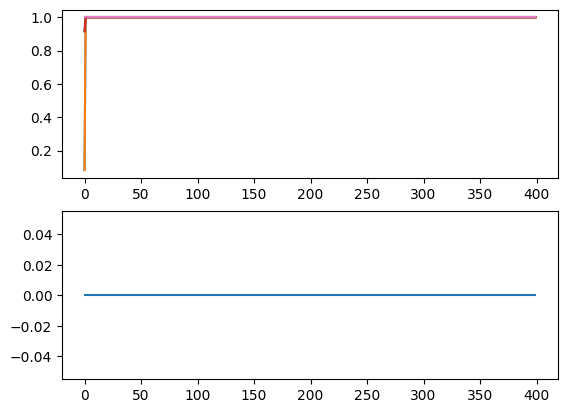

In [63]:
fig,ax = plt.subplots(2,1)


ax[0].plot(train_acc)
ax[0].plot(test_acc)
ax[1].plot(losses)

In [66]:
for i in range(10):
  losses,test_acc ,train_acc = creat_ann('SGD',0.01)

  print(f'the test acc is:{np.mean(np.array(test_acc).reshape(-1)):.2f} . and the train : {np.mean(np.array(train_acc).reshape(-1)):.2f} at the {i} epoch')

the test acc is:0.99 . and the train : 1.00 at the 0 epoch
the test acc is:0.99 . and the train : 0.99 at the 1 epoch
the test acc is:1.00 . and the train : 1.00 at the 2 epoch
the test acc is:1.00 . and the train : 1.00 at the 3 epoch
the test acc is:0.99 . and the train : 0.99 at the 4 epoch
the test acc is:1.00 . and the train : 1.00 at the 5 epoch
the test acc is:1.00 . and the train : 1.00 at the 6 epoch
the test acc is:1.00 . and the train : 1.00 at the 7 epoch
the test acc is:1.00 . and the train : 1.00 at the 8 epoch
the test acc is:1.00 . and the train : 1.00 at the 9 epoch
